#### Lab 4 Report

Author names go here 

Michael Lee, David Yu, Wengjie Ma

(This should be a markup cell, which means that when you run it you just get formated text.)

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 
import decimal
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa


Assignment 1 - Convolving Signals

<IPython.core.display.Javascript object>


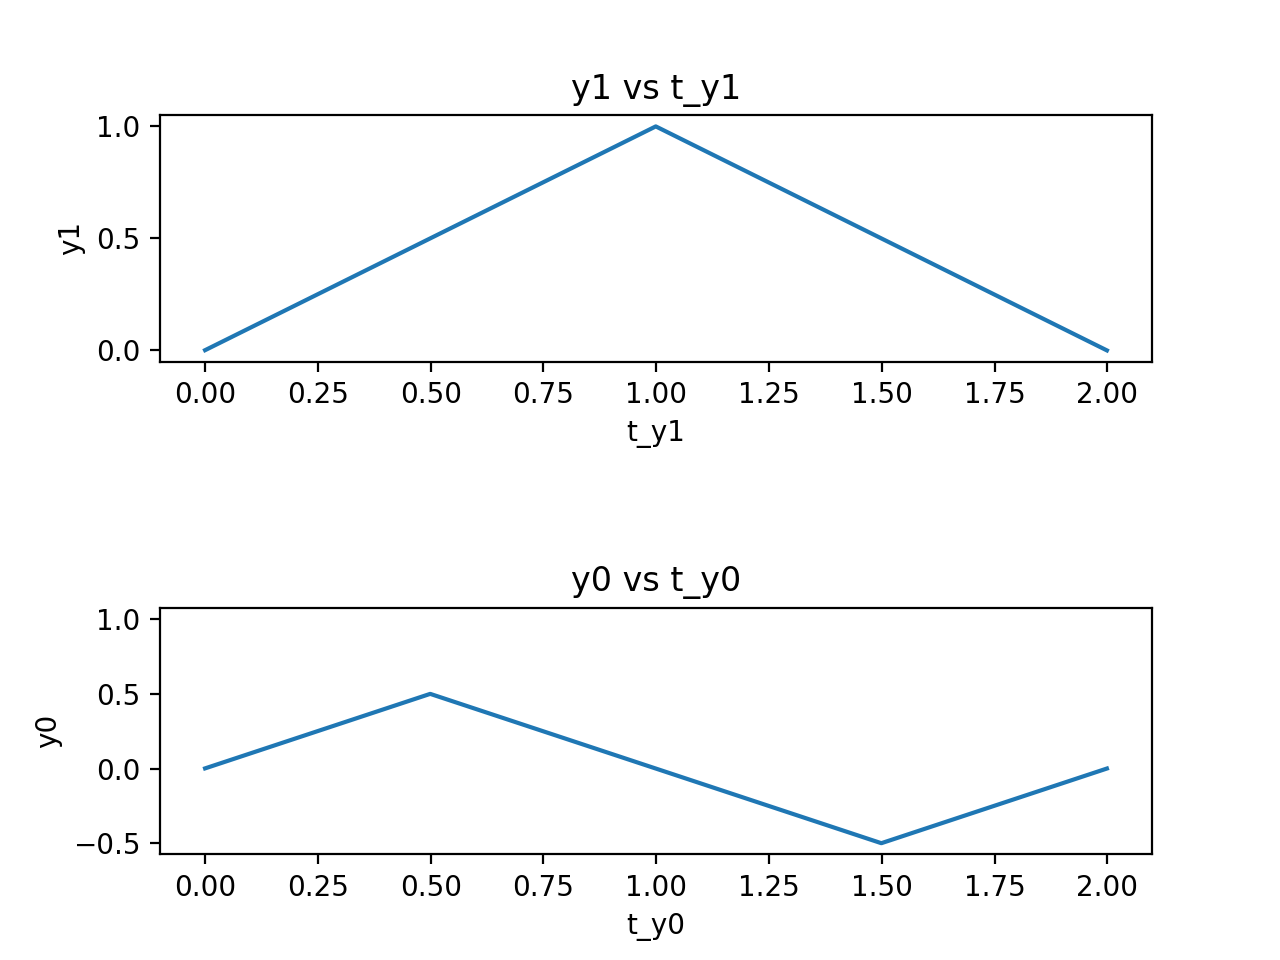

1.0
0.0


In [3]:
# Assignment 1
# A
fs = 1000
t = np.arange(0,1,1/fs)
s1 = np.heaviside(t, 1) - np.heaviside(t-1, 1)
# s0 = -s1
s0 = np.heaviside(t, 1) - np.heaviside(t-0.5, 1)-np.heaviside(t-0.5,1)+np.heaviside(t-1,1)

# B
y1 = np.concatenate([np.convolve(s1,s1)/fs,np.zeros(1)])
y0 = np.concatenate([np.convolve(s1,s0)/fs,np.zeros(1)])

# C
t_y1 = np.arange(0,len(y1),1)/fs
t_y0 = np.arange(0,len(y0),1)/fs

fig = plt.figure(1)
fig.subplots_adjust(hspace = 1, wspace = 0.35)

plt.subplot(2,1,1)
plt.plot(t_y1,y1,1)
plt.title('y1 vs t_y1')
plt.ylabel('y1')
plt.xlabel('t_y1')

plt.subplot(2,1,2)
plt.plot(t_y0,y0,1)
plt.title('y0 vs t_y0')
plt.ylabel('y0')
plt.xlabel('t_y0')

# D
y1_corr = y1[len(s1)-1]
y0_corr = y0[len(s0)-1]
print(y1_corr)
print(y0_corr)

Discussion

The correlation coefficient would be less because the new s0 is more similar to s1 than the original s0. This means the original s0 would me more useful for communication because it's easier to differentiate between s1 than it is with the new s0.

Assignment 2

In [6]:
# Assignment 2
# A
def decode(r, fs, s0, s1):
    y0 = np.concatenate([np.convolve(r,s0)/fs,np.zeros(1)])
    y1 = np.concatenate([np.convolve(r,s1)/fs,np.zeros(1)])
    y0_corr = y0[len(s0)-1]
    y1_corr = y1[len(s1)-1]
    if y1_corr > y0_corr:
        return '1'
    else:
        return '0'

Discussion
 
If yr1 and yr0 were 20ms long, then they would reach the peak height much faster and stay there for ~>1s, but the peak height would be much lower.

<IPython.core.display.Javascript object>


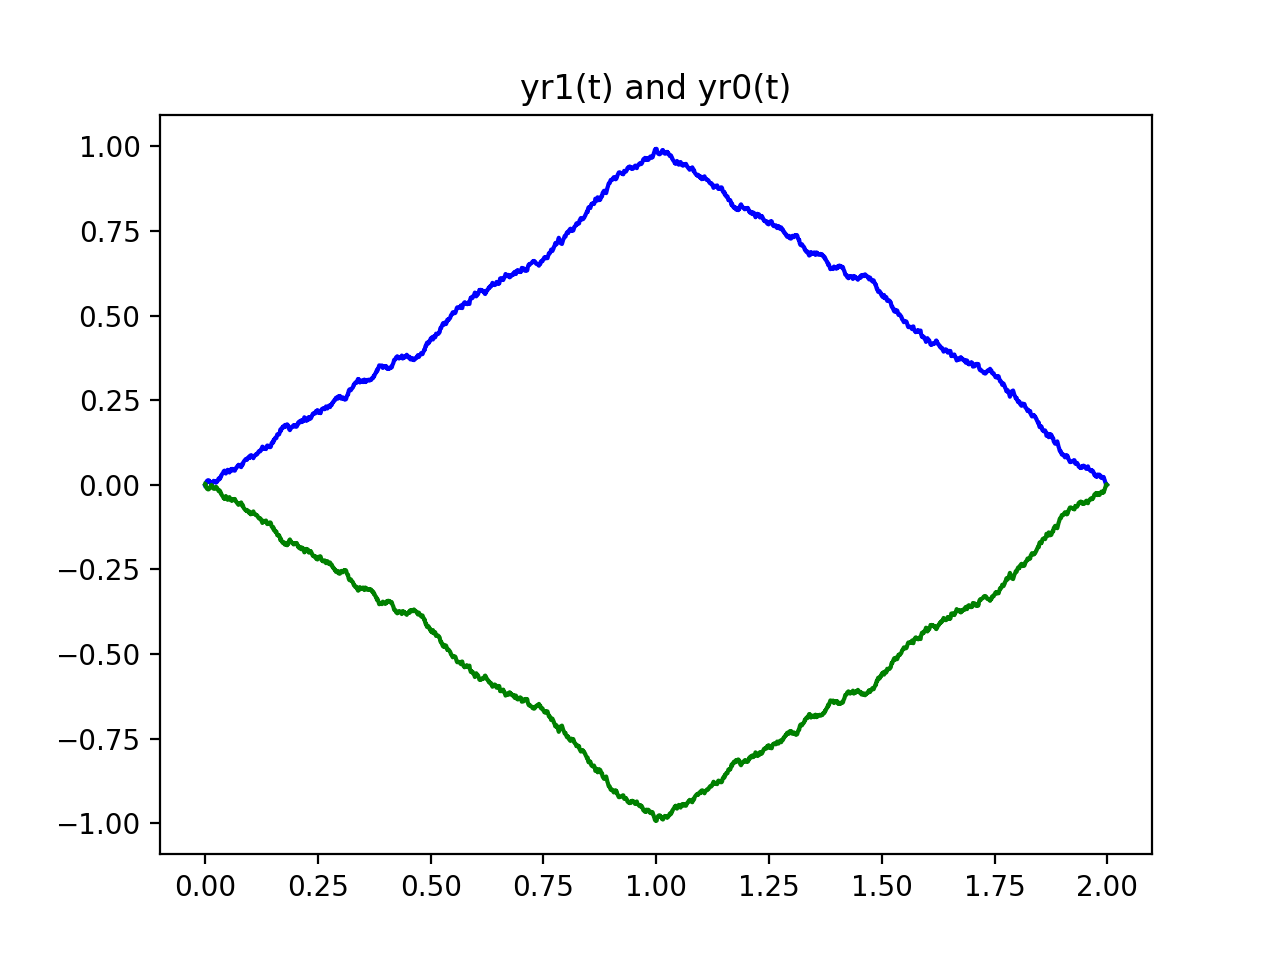

0.9902822775441272
-0.9902822775441272
1


In [13]:
# Assignment 2
# B
fs = 1000
t = np.arange(0,1,1/fs)
s1 = np.heaviside(t, 1) - np.heaviside(t-1, 1)
s0 = -s1

# a
n = np.random.normal(0,3,len(s1))
# b
r = s1 + n
r0 = s0 + n
# c
s1s0 = np.concatenate([s1,s0])
rr0 = np.concatenate([r,r0])
t = np.arange(0,len(s1s0),1)/fs

fig = plt.figure(1)
plt.plot(t,rr0,'b')
plt.plot(t,s1s0,'g')
plt.title('signals with and without noise')

# C
# a
yr1 = np.concatenate([np.convolve(r,s1)/fs,np.zeros(1)])
yr0 = np.concatenate([np.convolve(r,s0)/fs,np.zeros(1)])
t_yr = np.arange(0,len(yr1))/fs
# b
fig = plt.figure(2)
plt.plot(t_yr,yr1,'b')
plt.plot(t_yr,yr0,'g')
plt.title('yr1(t) and yr0(t)')
# c
yr1_corr = yr1[len(s1)-1]
yr0_corr = yr0[len(s0)-1]
print(yr1_corr)
print(yr0_corr)

# D
yr_d = decode(r,fs,s0,s1)
print(yr_d)

Assignment 3

In [8]:
# Assignment 3
fs = 8000
t = np.arange(0,1,1/fs)
s1 = np.heaviside(t, 1) - np.heaviside(t-1, 1)
s0 = -s1

# A
file = open('receivedmsg.csv','rb')
rm = np.loadtxt(file, delimiter=',')

# B
message = ''
for row in rm:
    bit = decode(row,fs,s0,s1)
    message += bit

print(message)

0100011101101111001000000100100001110101011100110110101101101001011001010111001100100001


Discussion

Go Huskies!